# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?
3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 
4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?
5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)
6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?
7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers, losses
#from tensorflow.Keras import losses
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import seaborn as sns
#import pydot



&lt;matplotlib.axes._subplots.AxesSubplot at 0x1fa70051400&gt;

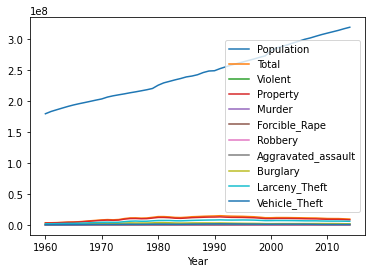

In [2]:
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")
df.set_index("Year", inplace=True)
df.plot()

In [5]:
#Dividing the train/test data. Only having 10 values for test, as dataset in general is very small. 

print("NAN data:", df.isna().sum())
data_train = df[:45]
data_test = df[45:]

NAN data: Population            0
Total                 0
Violent               0
Property              0
Murder                0
Forcible_Rape         0
Robbery               0
Aggravated_assault    0
Burglary              0
Larceny_Theft         0
Vehicle_Theft         0
dtype: int64


In [6]:
data_train.shape

(45, 11)

&lt;seaborn.axisgrid.PairGrid at 0x1fa733409d0&gt;

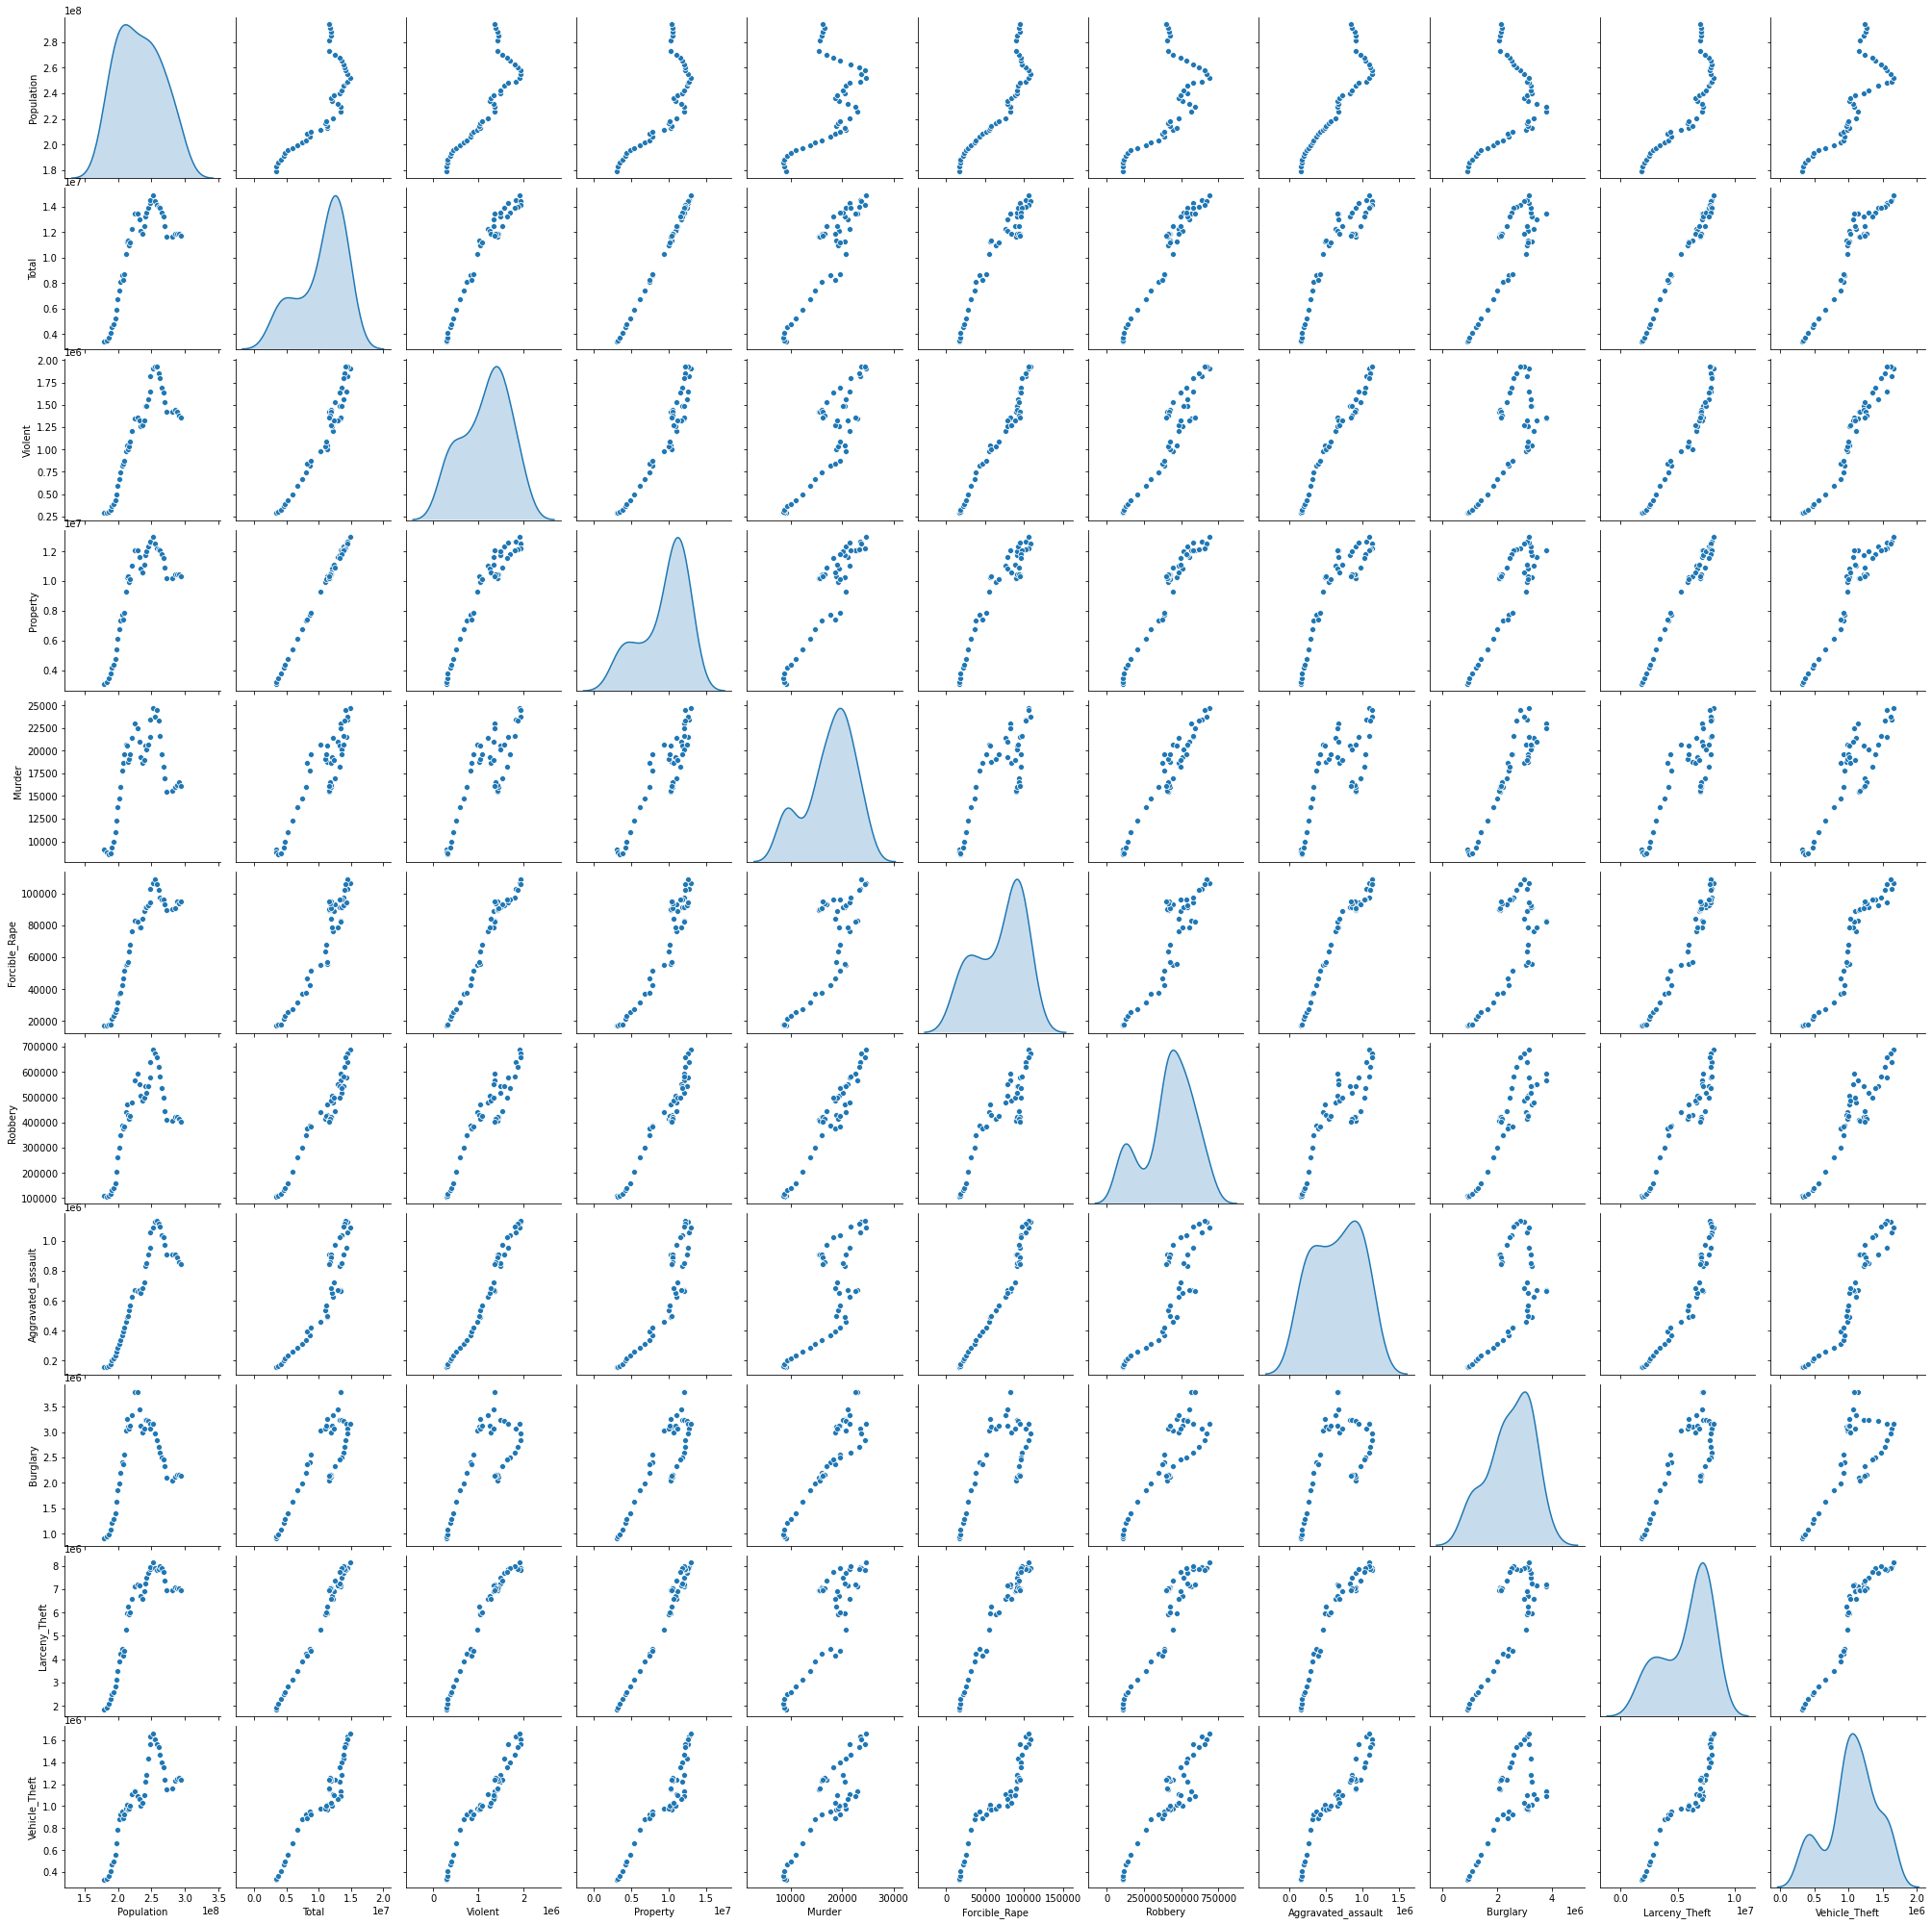

In [7]:
sns.pairplot(data_train, diag_kind="kde")

In [9]:
#Splitting train data is train and validation. 
X_train, X_valid, y_train, y_valid = train_test_split(data_train.drop("Murder", axis=1),\
                                                      data_train['Murder'].tolist(),\
                                                      test_size=0.1,\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Valid data len:'+str(len(X_valid)))

Train data len:40
Valid data len:5


In [10]:
#Test data:
X_test = data_test.drop("Murder", axis=1)
y_test = data_test["Murder"].tolist()

In [11]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,y_valid))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

---------------------

In [ ]:
#Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?

#Building model

In [12]:
model_no_convolucional = tf.keras.Sequential([
layers.Dense(32, activation='relu', input_shape=[len(data_train.keys())]),
layers.Dense(32, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(1)])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model_no_convolucional.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

model_no_convolucional.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


In [13]:
#train model
epochs = 5
history = model_no_convolucional.fit(train_ds.shuffle(100).batch(5),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(5),
                    verbose=1)

Epoch 1/5


ValueError: in user code:

    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Roxan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 11 but received input with shape [None, 10]
